## Preprocessing

In [1]:
with open("task/train.txt") as file:
    data = file.read()
    train_ids=data.split()
with open("task/valid.txt") as file:
    data = file.read()
    test_ids=data.split()

In [2]:
from PIL import Image

def get_image(img_id):
    image = Image.open(f'images/{img_id}.jpg')
    return image

In [3]:
from xml.dom import minidom
def get_svg_polygons(img_id):
    #source: https://stackoverflow.com/a/15857847
    doc = minidom.parse(f'ground-truth/locations/{img_id}.svg')
    path_strings = [path.getAttribute('d') for path
                in doc.getElementsByTagName('path')]
    doc.unlink()
    polygons=[]
    for path_string in path_strings:
        splitted_path_string=path_string.split()
        temp_coor=[]
        polygons.append([])
        for i in range(len(splitted_path_string)):
            if i%3==0 and i!=0:
                polygons[-1].append(tuple(temp_coor))
                temp_coor=[]
            elif i!=0:
                temp_coor.append(float(splitted_path_string[i]))
        
    return polygons

In [4]:
#source: https://stackoverflow.com/a/59208291
def crop(image):
    y_nonzero, x_nonzero, _ = np.nonzero(image<255)
    image = Image.fromarray(image, "RGB")
    return image.crop((np.min(x_nonzero), np.min(y_nonzero), np.max(x_nonzero), np.max(y_nonzero)))

In [5]:
import numpy as np
from PIL import ImageDraw
from IPython.display import display
from tqdm.notebook import tqdm
import cv2

def get_binarized_words(img_id):
    polygons=get_svg_polygons(img_id)

    im=get_image(img_id).convert("RGB")
    imArray = np.asarray(im)
    
    binarized_words=[]

    for polygon in tqdm(polygons):
        #source: https://stackoverflow.com/a/22650239

        maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
        ImageDraw.Draw(maskIm).polygon(polygon, outline=1, fill=1)
        mask = np.array(maskIm)
        newImArray = np.empty(imArray.shape,dtype='uint8')

        newImArray[:,:,:3] = imArray[:,:,:3]

        newImArray[:,:,0] = np.invert(newImArray[:,:,0])
        newImArray[:,:,1] = np.invert(newImArray[:,:,1])
        newImArray[:,:,2] = np.invert(newImArray[:,:,2])

        newImArray[:,:,0] = newImArray[:,:,0] * mask
        newImArray[:,:,1] = newImArray[:,:,1] * mask
        newImArray[:,:,2] = newImArray[:,:,2] * mask

        newImArray[:,:,0] = np.invert(newImArray[:,:,0])
        newImArray[:,:,1] = np.invert(newImArray[:,:,1])
        newImArray[:,:,2] = np.invert(newImArray[:,:,2])

        newIm=crop(newImArray)

        img = np.array(newIm)
        img = img[:, :, ::-1].copy() 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        blur = cv2.GaussianBlur(img,(5,5),0)

        _,bin_img = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        binarized_words.append(Image.fromarray(bin_img))

    return binarized_words



In [6]:
import random
train_id=random.choice(train_ids)

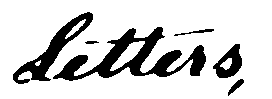

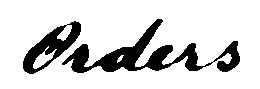

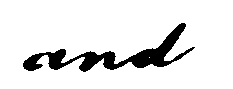

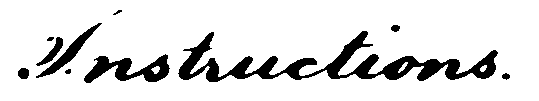

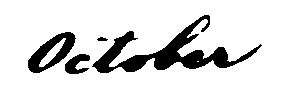

In [34]:
binarized_imgs = get_binarized_words(train_id)

for img in binarized_imgs[:5]:
    display(img)

In [28]:
import numpy as np

def n_transitions(img):
    n = 0
    for row in img:
        current = row[0]
        for pixel in row[1:]:
            if pixel != current:
                n += 1
                current = pixel
    return n_transitions

def upper_contour(img):
    pass

def lower_contour(img):
    pass

In [33]:
features_dict = {
    'transitions':n_transitions,
}


transposed_imgs = [np.transpose(np.array(img)) for img in binarized_imgs]

feature_vectors_dict = {}


for label, func in tqdm(features_dict.items()):
    feature_vec = []
    for img in transposed_imgs:
        feature_vec.append(func(img))
    
    feature_vectors_dict[label] = feature_vec
    

print(feature_vectors_dict)


{'transitions': [992, 710, 434, 1464, 764, 394, 60, 292, 310, 240, 1052, 1112, 276, 360, 920, 876, 574, 244, 732, 710, 188, 462, 190, 902, 960, 1056, 242, 682, 1158, 452, 740, 564, 560, 162, 612, 1052, 112, 614, 102, 914, 262, 500, 440, 196, 486, 662, 162, 938, 456, 280, 536, 410, 338, 218, 542, 240, 90, 608, 890, 224, 384, 324, 386, 404, 376, 324, 420, 408, 198, 476, 446, 306, 686, 524, 704, 412, 298, 478, 142, 770, 210, 270, 396, 398, 208, 148, 540, 414, 882, 536, 289, 460, 830, 736, 696, 306, 446, 404, 368, 364, 682, 486, 180, 856, 492, 394, 460, 734, 638, 220, 262, 648, 312, 182, 200, 374, 348, 350, 328, 658, 144, 466, 150, 482, 408, 904, 280, 368, 416, 646, 476, 290, 430, 550, 650, 256, 362, 316, 314, 396, 284, 452, 1340, 906, 310, 460, 1126, 1392, 246, 528, 718, 734, 1172, 150, 680, 150, 852, 790, 974, 442, 482, 416, 274, 410, 256, 452, 350, 366, 198, 580, 532, 724, 530, 304, 112, 142, 556, 466, 282, 226, 248, 834, 552, 460, 214, 632, 370, 584, 228, 724, 654, 1228, 164, 222, 222